# Transformer (cont'd)
* seq2seq with attention 성능을 개선 그 모델을 대체함

## Transformer: Multi-Head Attention
* self-attention module을 유연하게 확장함
* 동일한 query, key, value vector들에 대해 동시에 병렬적으로 여러 버전의 attention을 수행함
  * 버전마다 해당하는 $W^Q$, $W^K$, $W^V$가 각각 존재함
  * $i$ 번째 attention에서 $W_{i}^{Q}$, $W_{i}^{K}$, $W_{i}^{V}$를 사용하여 query vector에 대한 encoding vector를 계산함
  * 버전의 개수만큼 encoding vector가 나옴
  * encoding vector들을 concat하여 최종적으로 해당 query vector에 대한 encoding vector를 얻음
  $$\mathrm{MultiHead}(Q, K, V) = \mathrm{Concat}(\mathrm{head_{1}}, \cdots, \mathrm{head_{h}})W^{O} \\ \mathrm{where} \  \mathrm{head_{i}} = \mathrm{Attention}(QW_{i}^{Q}, KW_{i}^{K}, VW_{i}^{V})$$
  * pad : attention을 수행하기 위한 선형변환 matrix($W^Q$, $W^K$, $W^V$)

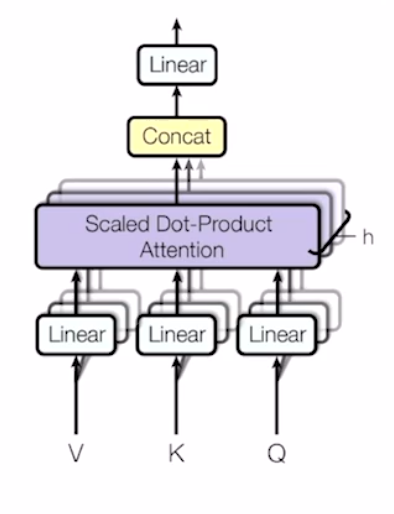


* Multi-Head Attention이 필요한 이유
  * 동일한 sequence가 주어졌을 때, 특정 query word에 대해 서로 다른 기준으로 여러 측면의 정보를 병렬적으로 뽑아 그 정보들을 다 합치는 형태로 attention module 구성할 수 있음
    * 각 head가 서로 다른 정보들을 상호보완적으로 뽑는 역할을 함
    * 여러 문장으로 이루어져있지만 주어진 하나의 sequence로서 보는 경우
      * I went to the school. I studied hard. I came back home and I took the rest.
      `I` 라는 query word에 대한 encoding을 수행하기 위해 `I`라는 주체가 하는 행동을 중심(`went`, `studied`, `came back home`, `took the rest`)으로 정보를 뽑을 수 있음.
      또는 `I`라는 주체가 존재하는 장소의 변화(`school`, `home`)를 중심으로 장소에 대한 정보를 뽑을 수 있음


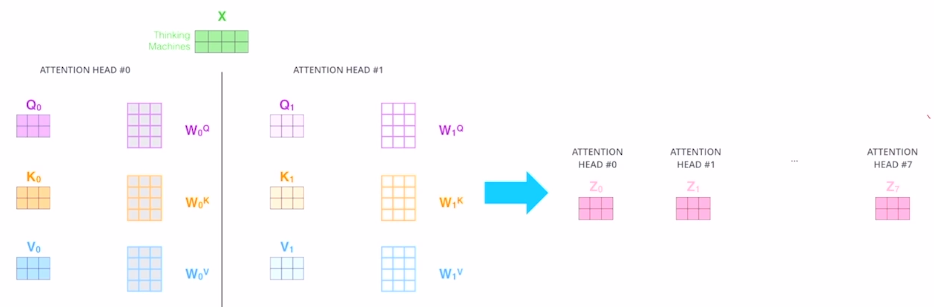


* concat한 encoding vector를 linear transformation을 통해서 원하는 dimension의 결과를 얻음

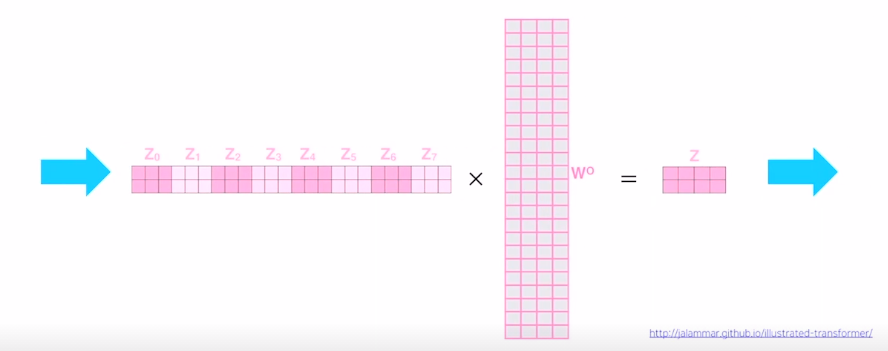

 * attention model의 계산량 또는 메모리요구량의 측면에서의 특성과 기존 RNN기반의 sequence encoding 간의 비교
* notation
  * `n` : the sequence length
  * `d` : the dimension of representation
  * `k` : the kernel size of convolutions
  * `r` : the size of the neighborhood in restricted self-attention

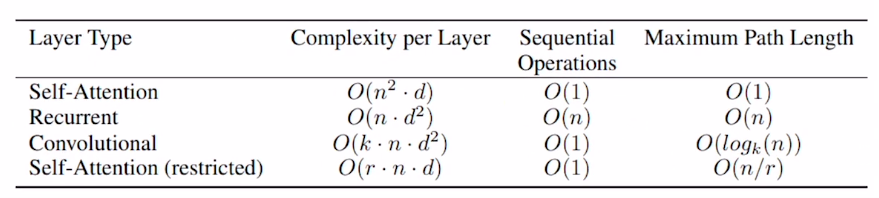

* Self-Attention
  * Complexity per Layer : $O(n^{2} \cdot d)$
    * 모든 query와 key에 대해 내적을 계산해야함
    * $d$ : 특정 query와 key에 대해 $d$ dimension의 내적. $d$만큼의 곱셈 및 덧셈을 수반함
    * $n^{2}$ : 모든 query와 key의 조합
  * Sequential Operations : $O(1)$
    * 병렬 계산
    * GPU의 core 수가 충분히 많다면 sequence의 길이 또는 dimension 수와 상관없이 GPU에 특화된 행렬 연산의 병렬화를 통해 core 수가 충분히 뒷받침 된다면 한번에 계산 가능함
  * 계산량, 메모리 요구량 : $n^{2}$에 비례함
    * forwardpropagation에서 메모리에 모두 저장하고 있어야 함(backpropagation에서 사용하기 위함)
    * $d$ : self-attention을 정의할 때 hidden-state vector의 dimension으로서 hyperparameter가 되고, 특정값으로 지정 가능함
    * $n$ : 입력 데이터의 sequence에 따라 가변적인 길이를 가짐
    * RNN보다 더 많은 메모리 요구량이 필요함(모든 query와 key에 대한 값을 저장하고 있어야 하기 때문)
  * Maximum Path Length : $O(1)$
    * Long-term Dependency와 관련이 있음
    * sequence에서 특정 단어를 계산할 때 어떤 위치의 단어든지 key와 value vector의 단어로 보기 때문에 timestep이 차이가 많이 나더라도 정보를 한번에 가져올 수 있음
    * Long-term dependency를 해결한 결과를 가져옴

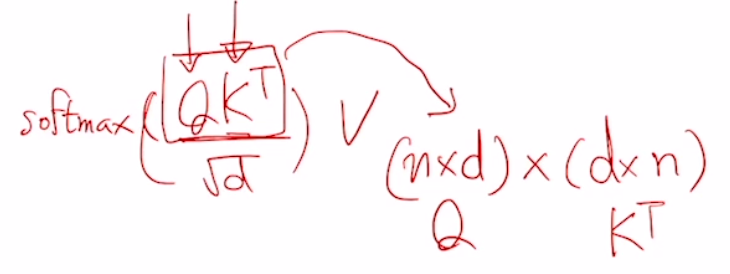

* Recurrent(RNN)
  * Complexity per Layer : $O(n \cdot d^{2})$
    * $d^{2}$ : 이전 timestep의 hidden state vector가 다음 timestep의 hidden state vector에 변환이 되어 참여하는 경우, $h_{t-1}$의 dimension이 $d$라고 하면, $d$ dimension의 vector를 입력으로 받아 $d$ dimension의 vector를 출력으로 내어주기 때문에 $W_{hh}(d \times d)$와 계산해야함
    * $n$ : sequence의 길이, 매 timestep마다 $d^{2}$ 계산을 해주어야 함
  * Sequential Operations : $O(n)$
    * 병렬화가 불가능함
    * 이전 timestep의 $h_{t-1}$을 계산해야만 다음 timestep의 $h_{t}$를 계산할 수 있기 때문에, $h_t$를 계산하기 위해서는 $h_{t-1}$이 계산될때까지 기다려야함
  * 계산량, 메모리 요구량 : $n$에 비례함
    * forwardpropagation에서 메모리에 모두 저장하고 있어야 함(backpropagation에서 사용하기 위함)
    * $d$ : self-attention을 정의할 때 hidden-state vector의 dimension으로서 hyperparameter가 되고, 특정값으로 지정 가능함
    * $n$ : 입력 데이터의 sequence에 따라 가변적인 길이를 가짐
  * Maximum Path Length : $O(n)$
    * Long-term Dependency와 관련이 있음
    * sequence에서 특정 단어를 계산할 때 다른 단어의 정보를 적용하기 위해서는 그 단어의 정보를 가져오기 위해서 timestep의 gap 만큼의 layer를 지나와야 함

    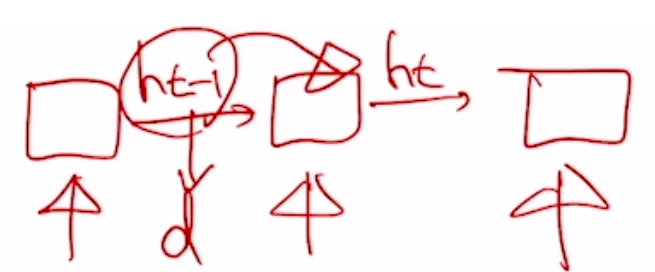

    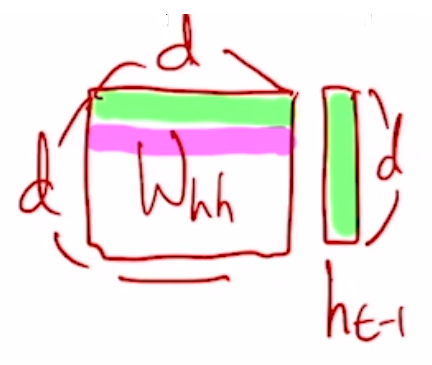


* Self-Attention은 RNN보다 빠르게 학습할 수 있지만, 더 많은 양의 메모리를 필요로 함

## Transformer: Block-Based Model
* Transformer에서 Multi-head attention을 핵심 module로 하고, 추가적인 여러 후처리를 진행하여 하나의 module을 구성함
* Each block has two sub-layers
  * Multi-head attention
  * Two-layer feed-forward NN(with ReLU)
* Each of these two steps also has(추가 연산)
  * Residual Connection(Add operation) and layer normalization
  * $\mathrm{LayerNorm}(x + \mathrm{sublayer}(x))$

* self-attention을 포함한 하나의 블럭
  * output : input과 동일한 dimension을 가지고 각 word에 대응되는 encoding vector

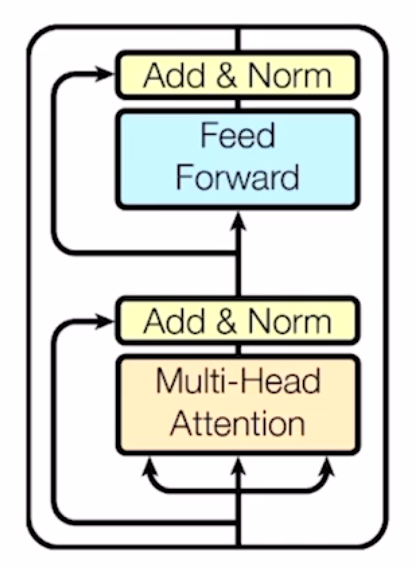
  


* Feed Forward
  * multi-head attention과 residual connection, layer normalization을 거쳐서 나온 encoding vector를 추가적인 fully connected layer 하나를 통과 시켜 각 word의 encoding vector를 변환함

* Residual Connection
  * Computer Vision쪽에서 깊은 layer의 neural network를 만들 때, gradient vanishing 문제를 해결하여 학습은 안정화 시키면서 layer를 계속 쌓아감에 따라 더 높은 성능을 보일 수 있도록 하는 효과적인 모델
  * gradient vanishing문제를 해결하고 학습도 안정화 시킬 수 있음
  * residual connection을 적용하기 위해 input vector와 encoding의 output vector간의 dimension이 정확하게 동일하도록 유지되어야 함(각 dimension 별로 값을 더하여 동일한 dimension을 가지는 vector를 만들어줄 수 있음)
  * ex. I study math에서 I의 input vector를 $[[1], [-4]]$라고 하고 multi-head attention을 통과해서 나온 output vector(`I`의 encoding vector)를 $[[2],[3]]$이라 하면, residual connection에 의해서 최종적으로 `I`에 대한 encoding vector $[[3], [-1]]$를 얻음
  => 입력값 대비 만들고자하는 vector의 차이를 multi-head attention에서 만들어줌
    * output layer에 해당하는 linear transformation에서 concat한 encoding vector를 input vector와 동일한 dimension으로 만들어주는 역할을 함

### Transformer: Layer Normalization

* 다양한 normalization 기법이 존재함
* 주어진 다수의 sample에 대해서 평균을 0, 분산을 1로 만든 후, 원하는 평균과 분산을 주입할 수 있도록 하는 선형변환으로 이루어짐

$$\mu^{l} = {1 \over H}\sum_{i=1}^{H}{a_{i}^{l}}$$
$$\sigma^{l} = \sqrt{{1 \over H}\sum_{i=1}^{H}(a_{i}^{l} - \mu^{l})^{2}}$$
$$h_{i} = f({g_{i} \over \sigma_{i}}(a_{i} - \mu_{i}) + b_{i})$$

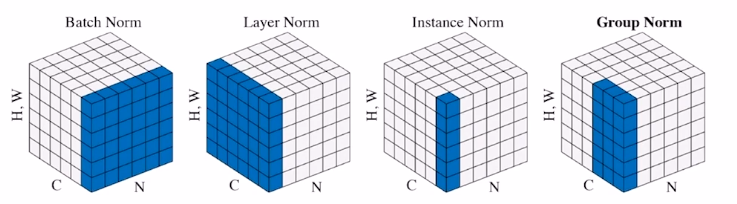

* Batch Norm
  * 학습과정에서 neural network의 특정 노드에서 발견되어야 하는 값에 가장 최적화된 평균과 분산을 원하는 만큼 가지도록 조절할 수 있음
  * ex. neural network의 batch size가 3이라고 할때, input layer에 3차원벡터를 총 3개의 data instance에 대해 넣어주고, forward propagation 당시의 특정 node에서 발생되는(계산된) 값(특정 layer의 특정 node에서 발생된 값)을 $3, 5, -2$라고 하는 경우
    * 평균을 $0$ 분산을 $1$로 만들어주는 연산을 수행함
      * $3, 5, -2$의 평균인 $2$를 각각의 값에서 빼주어($1, 3, -4$) 평균을 $0$으로 변환
      * $1, 3, -4$의 표준편차를 각각의 값에서 나눠주어(${1 \over \sqrt{26}}, {3 \over \sqrt{26}}, {{-4} \over \sqrt{26}}$) 분산을 $1$로 변환
  * 변환 후 각각의 값에 대해 affine transformation라고 하는 $y = 2x + 3$ 연산을 수행함
    * $x$에 값을 대입하여 각각 연산함
    * 평균은 0에서 $3$, 분산은 1에서 $2^{2} = 4$로 변환됨 
    * $2, 3$은 gradient descent에 의해 최적화를 하는 parameter

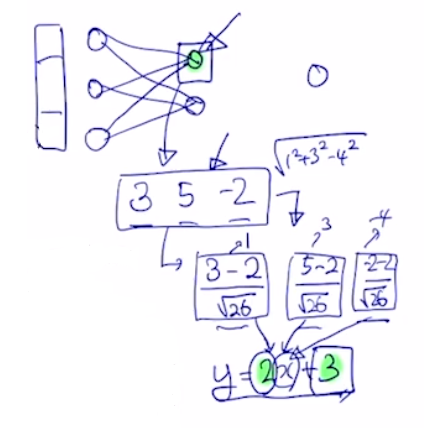

* Layer Norm
  * 학습을 안정화하고 최종 성능을 끌어 올리는데 중요한 역할을 함
  * ex. 'thinking machine'에 대해 layer normalization하는 경우(dimension = $4$)
    * 각 word에 대해 특정 layer의 node 값들을 모아(column 기준으로) 평균과 표준편차를 구한 후, 평균을 $0$, 분산을 $1$로 만들어주는 변환을 함
    * affine transformation($y = ax + b$)
      * 각 node 별로(row 기준으로) 여러 단어에 걸쳐서 공통적인 변환을 수행함

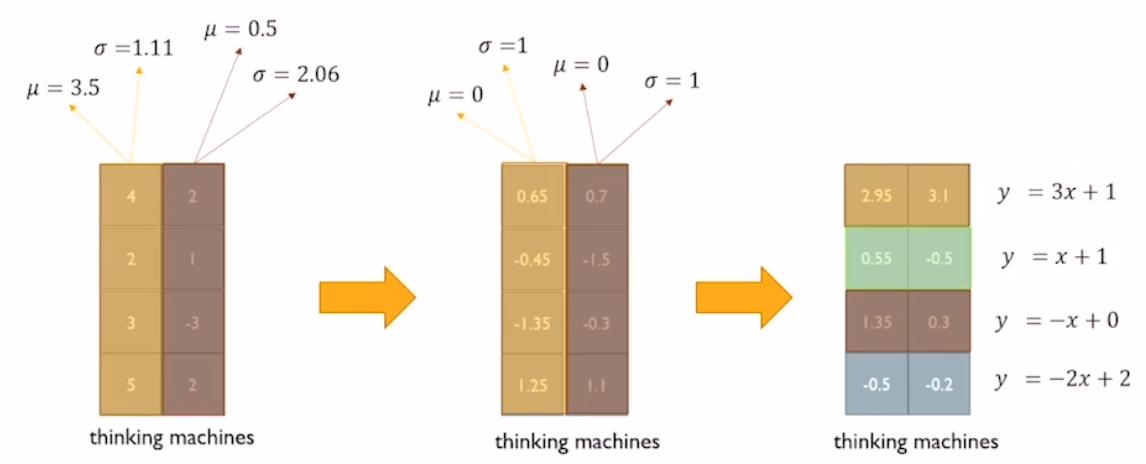

## Transformer: Positional Encoding
* Transformer와 self-attention은 순서를 가질 수 없는 한계점이 있음
  * self-attention을 기반으로 주어진 sequence를 encoding하는 경우 key, value pair(순서를 고려하지 않는 각 집합으로 봄)들은 순서에 상관없이 각 key별로 주어진 query와의 attention 유사도를 구하고, 해당 value vector의 가중치를 부여해서 가중합을 하여 주어진 query vector에 대한 encoding vector를 얻음
    * 가중 평균을 구할 때 value vector들이 교환법칙이 성립되어 sequence에서 word의 위치가 바뀌어도(순서가 바뀌어도) encoding vector는 동일함
  * RNN은 순서를 반영하기 때문에(순서가 바뀌면 encoding vector도 바뀜) sequence 를 인식하고 구별해서 encoding vector를 얻어낼 수 있음
* Positional Encoding
  * 위치를 특정지을 수 있는 unique한 상수 vector를 각 순서에 등장하는 word input vector에 더해주는 방식
    * word vector에 상수 vector를 더해서 word의 위치를 표시함
  * 순서를 구별하는 vector를 $\sin, \cos$을 사용한 주기함수로 표현함
    * 여러 주기함수를 사용하여 $\sin$ 함수를 만든 후, 여기서 발생된 특정 $x$값(word 위치)에서의 함수값을 모아서 위치를 나타내는 vector로 사용함
  $$PE_{(pos, 2i)} = \sin{(pos / 10000^{2i/d_{model}})} \\ PE_{(pos, 2i+1)} = \cos{(pos / 10000^{2i/d_{model}})}$$

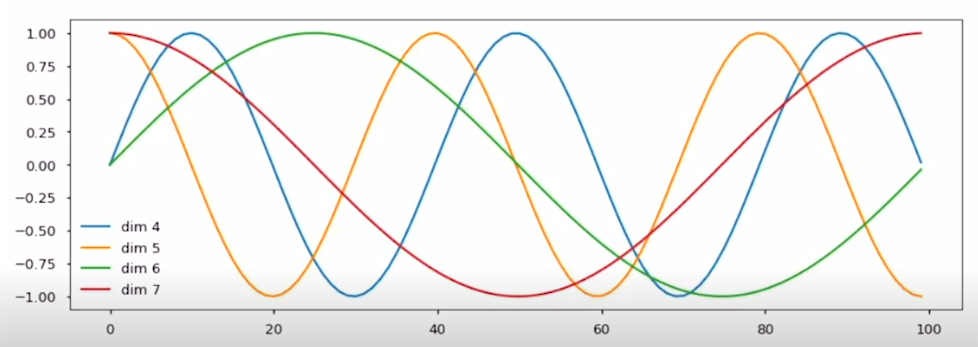
  

* 128 dimension의 input vector를 기준으로 만들어진 positional encoding vector
  * $y$축 : word 위치를 나타냄

  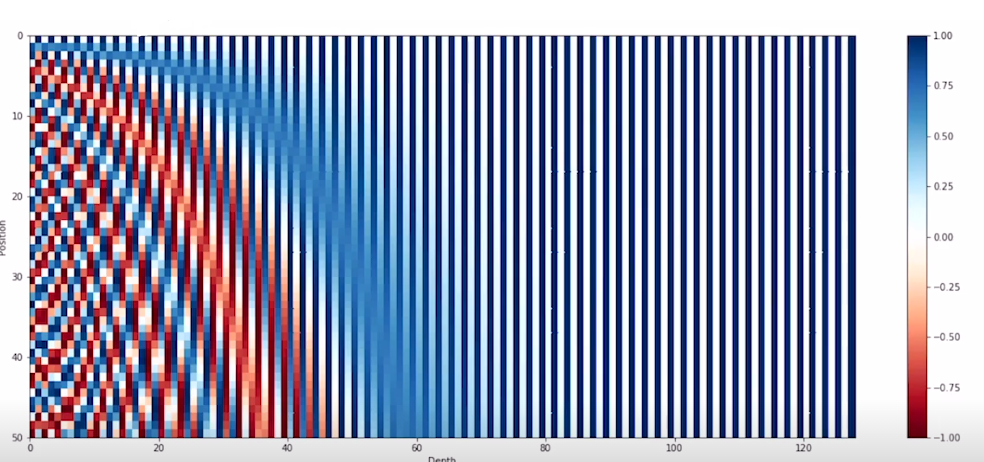

## Transformer: Warm-up Learning Rate Scheduler
* Learning Rate Scheduling
  * Gradient descent, Adam 등을 통하여 최적화를 수행하는 과정에서 사용되는 hyperparmeter인 learning rate를 학습 전 과정동안 고정된 값으로 사용하는 기존 방식과 달리, 학습을 빠르게 하고 최종 수렴하는 모델의 성능을 올리기 위해 learning rate값을 학습 중에 적절히 변경하여 사용함
  $$learning \  rate = d_{model}^{-0.5} \cdot \min{(\#step^{-0.5}, \#step \cdot warmup_steps^{-1.5})}$$

  * 최적화 하고자하는 parameter에 대해서 아래와 같이 그래프가 그려져있는 경우($x$ : # of iteration) minimum으로 도달하는 것이 gradient descent에서 일어나는 일
    * 최적화에 참여하는 parameter 값을 random하게 초기화함 -> 도달하고자하는 점과 상대적으로 거리가 먼 임의의 위치에서 시작할 가능성이 높음
    * 가장 왼쪽에서 시작한다고 가정하면, gradient가 매우 가파름 -> gradient의 절대값이 크기 때문에 작은 learning rate값을 곱해줌으로서 보폭이 많이 발생되는 것을 방지함
    * iteration이 진행됨에 따라 완만한 구간에 도달하면, 최종으로 도달해야하는 optimal point가 멀리 있을 수 있기 때문에 learning rate값을 올려줌 -> gradient의 절대값이 작기 때문에 적절히 큰 learning rate값을 곱하여 보폭을 늘림
    * 도달하고자 하는 점 근처에 도달한 경우
      * 큰 learning rate 또는 적은 iteration만에 도달한 경우, learning rate가 크면 보폭이 커서 정확한 접점에 도달하지 못하고 주변을 맴돌게 됨
      * 정확한 접점에 도달할 수 있도록 learning rate를 점차적으로 줄여줌

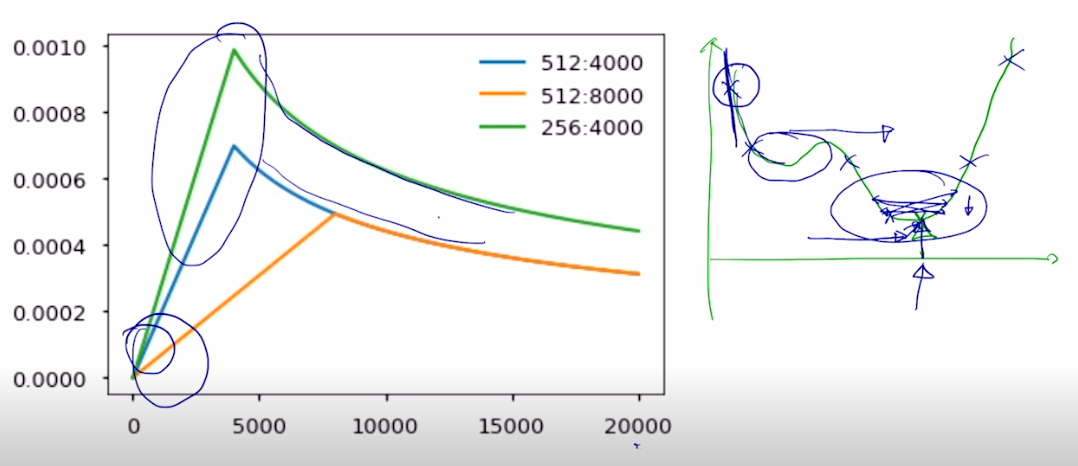

## Transformer: High-Level View
* Encoding 과정에서 encoding block을 $N$번($6, 12, 24, \cdots$) 반복하면서 encoding vector가 high level vector로 encoding이 진행됨
  * 각 block은 독립적인 parameter를 가짐

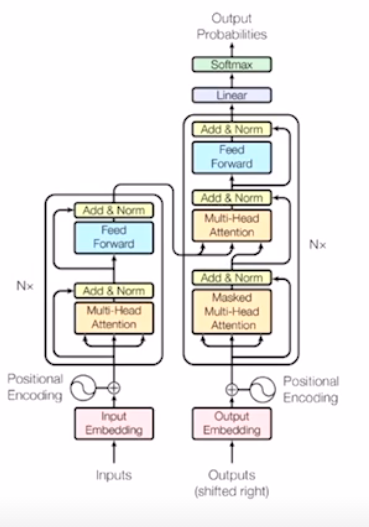

### Transformer: Encoder Self-Attention Visualization
* encoding 당시 특정한 layer에서의 attention model에서의 패턴
* 위와 아래가 모두 동일한 문장
* 주어진 각 word의 input vector가 attention module을 한번 수행할 때
  * 각 word가 query로 사용되었을 때(위의 단어 나열) 주어진 input vector(key, value, 아래 단어 나열)들을 사용하여 어떤 식으로 정보를 가져가는지에 대한 패턴을 보여줌


* 'making'을 query로 사용한 경우

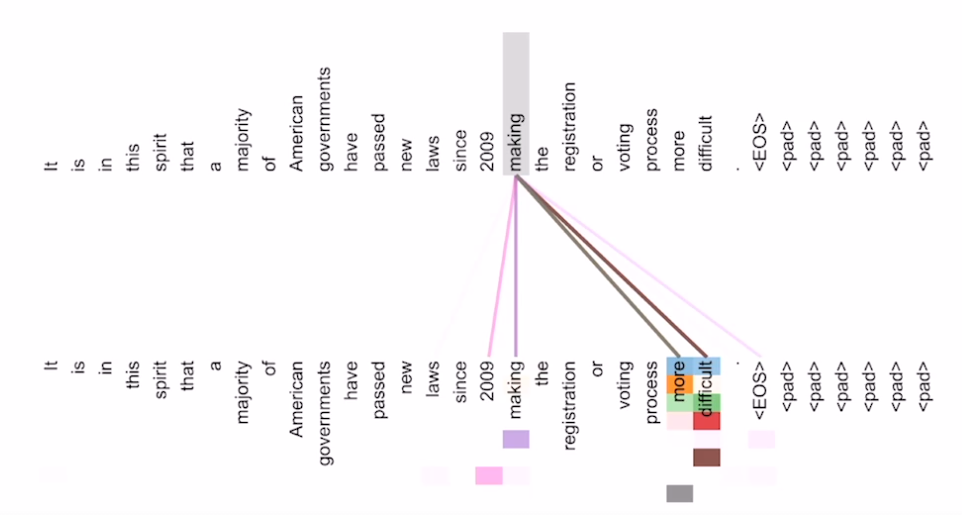

* query vector 'making' 이 'making'(자기 자신의 정보), 'more', 'difficult', '2009'(시기에 대한 정보, making이라는 action이 언제/언제부터 일어나는지에 대한 정보)
* 화살표의 두께, 색상
* 같은 word에서도 여러 grid가 그려짐 :
  * 맨 위의 grid : 첫 번째 head에서의 attention vector를 의미함
  * 두 번째 grid : 두 번째 head
  * 맨 위부터 head의 순서에 따라 grid가 해당됨
  * 4~5개의 head에서는 'making'의 목적보어에 해당하는 'more', 'difficult' 부분을 attention을 많이 가하면서 정보를 가져감
  * 자기자신을 attention 하는 특정 head가 존재함
  * 시기 정보를 주로 가져가고 있는 head가 존재함

* 'its'를 query로 사용한 경우

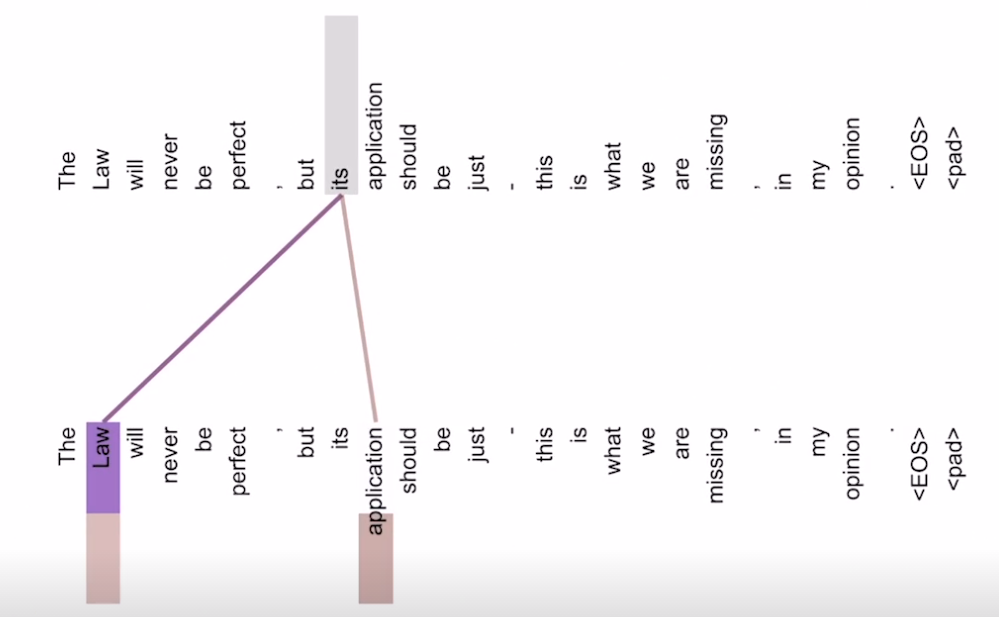

* 첫 번째 attention에서는 'Law'에 많은 가중치를 부여함
  * 'it'이 가리키는 단어에 대한 정보를 가져옴
* 두 번째 attention에서는 'application'에 많은 가중치를 부여함
  * 'its'가 한정해주는 해당 명사에 대한 정보를 가져옴

## Transformer: Decoder
* output sequence를 encoding함
  * 주어진 sequence를 (Masked)Multi-Head Attention으로 encoding한 후 Residual Connection & Layer Normalization을 거침
  * seq2seq with attention 모델의 decoder에서 hidden-state vector를 뽑는 과정에 해당함
* output sequence에 해당하는 encoding vector를 decoder의 hidden-state vector로 얻은 후, 다시 Multi-Head Attention의 입력으로 주어지고, encoder의 output 또한 Multi-Head Attention의 입력으로 주어 attention을 수행함
  * query : decoder에서 만들어진 hidden-state vector
  * key, vector : encoder의 최종 output
  * encoder, decoder간의 attention module
  * seq2seq with attention 모델에서 추가적인 attention module로서 encoder의 hidden-state vector 중 어느 vector를 가중치를 걸어 해당 정보를 서로다른 timestep에서 가져올지를 찾아서 정보를 가져옴
* Residual Connection & Layer Normalization, 
  * Residual Connection에 의해서 decoder의 input sequence에 대한 정보를 가지고 있음과 동시에, encoder에서 주어진 output vector에 대한 정보를 각각의 decoder에 해당하는 매 timestep마다 서로 다른 정보를 가져와서 그 정보를 잘 결합한 형태의 vector를 얻음
* Feed Forward, Residual Connection & Layer Normalization를 거쳐서 각 input word에 대한 decoder의 최종 encoding vector가 나오게 됨
* 각각의 vector에 linear transformation을 걸어서 target language에 해당하는 vocabulary size 만큼의 vector를 생성
* softmax를 취하고 특정한 한글 word에 대한 확률값을 뽑아서 다음 word에 대한 예측을 수행함
* 출력된 한글 단어에 대한 확률 분포는 ground truth 단어와의 softmax loss를 back-propagatoin에 의해서 전체 network의 학습이 진행됨
* ex. 'I go home'을 '나는 집에 간다'로 번역
  * decoder input : '<SOS\>', '나는', '집에'에 해당하는 각각의 embedding vector


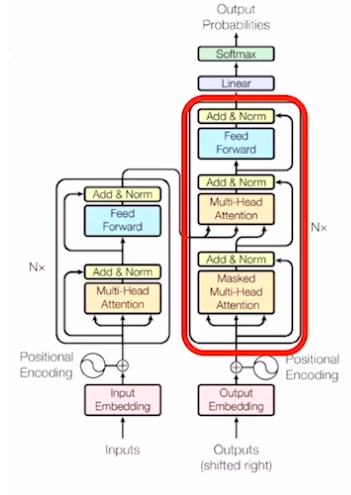

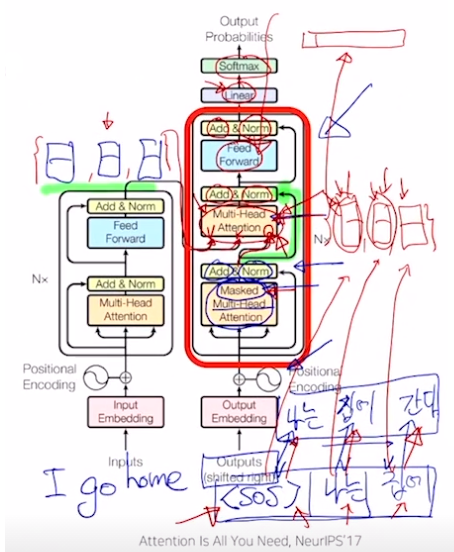

### Transformer: Masked Self-Attention
* (attetion의) masking : attention을 모두가 다 모두를 볼 수 있도록 허용한 후, 후처리적으로 보지말아야할 정보(아직 예측되지 않은 단어에 대한 정보)의 attention에 대한 가중치를 0으로 만들어 구조, 이후에 value vector가 가중평균을 내는 방식
  * attention을 변형한 방식
* decoding 과정 중에 주어진 sequence에 대해서 self-attention을 통해 sequence의 각 word를 encoding하는 과정에서 정보의 접근의 가능여부와 관련이 있음

* ex) '<SOS\>', '나는', '집에'에 해당하는 word에 대해서 이를 query, key로 사용하는 self-attention model을 수행하는 경우 $QK^{T}$를 계산하면 각 word에 대해(query : row) key(column)의 유사도를 결정하는 정보를 담고 있음
* 특정단어(ex. <SOS\>)를 query로 사용해서 attention model을 수행할 때는 접근가능한 key, value에서 아직 예측되지 않은 단어('나는', '집에')를 제외해야함

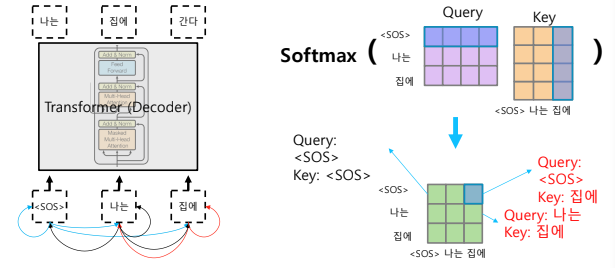

* 추가적인 후처리
  * softmax 이후에 확률값이 계산된 경우, 아직 예측되지 않은 단어의 정보(가져올 수 있는)를 차단해주어야 함
    * 해당 값을 0으로 처리함
    * 행렬의 대각선을 기준으로 윗부분에 해당하는 값을 모두 0으로 처리하는 과정을 수행함
  * 처리 후 다시 matrix의 row의 합(가중합)이 1이 되도록 normalize함

  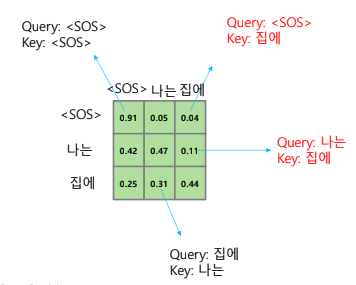

  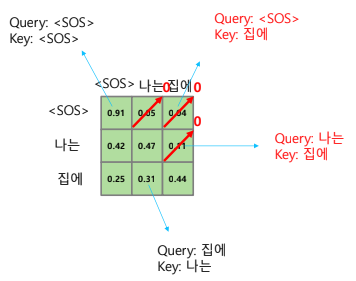

## Transformer: Experimental Results
* transformer model이 나옴으로서 seq2seq with attention과 같은 방법들의 성능을 더 올려주는 결과를 냄
* BLEU score : precision을 기반한 score
  * BLEU score의 최대값 : 100%
  * 번역이 20% ~ 40%정도 된 것이지만 좋은 성능을 낸 것
    * ground truth로 '나는 수학을 열심히 공부한다.'가 주어지고 '나는 열심히 수학을 공부한다.'라는 번역 문장이 예측값으로 주어진 경우 동일한 의미의 문장이더라도 bigram, trigram,four-gram값을 따질 때 해당 precision 값이 낮아지게 됨
    * BLEU score는 낮아도 google translate나 naver papago 등의 상용화된 기계번역 서비스에 필적하는 성능을 가짐
* Traning Cost : 학습 때 걸리는 계산량, 시간

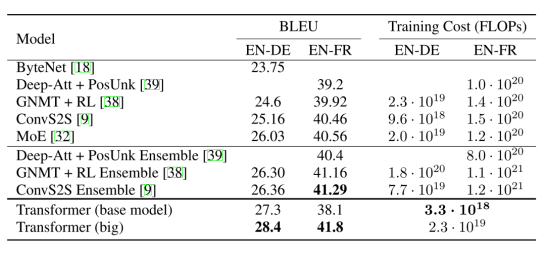